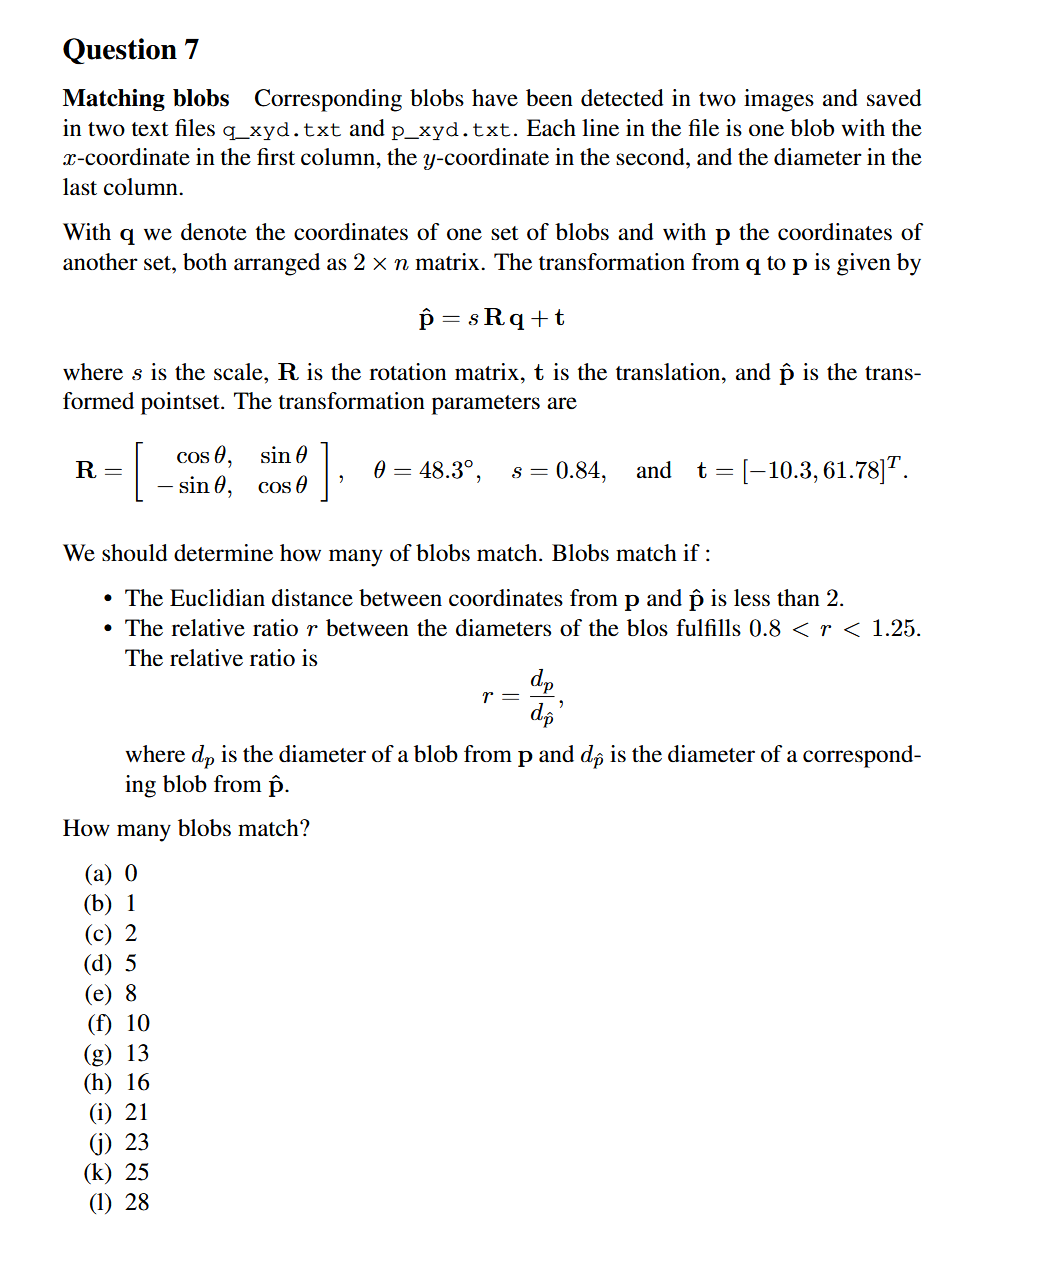

In [106]:
#%pip install scipy
import numpy as np 
import matplotlib.pyplot as plt
import skimage
import cv2
from functions import *
from scipy.ndimage import affine_transform
from function_week_3 import*

In [129]:
path = 'data/'

In [163]:
p_in = np.loadtxt(path + 'blobs/p_xyd.txt')
p = p_in[:, :2].T 
#print(p.reshape(2, -1))
print(p.T) # need to use T instead of reshape as it mixes up coordinates 
dp = p_in[:, 2]

q_in = np.loadtxt(path + 'blobs/q_xyd.txt')
q = q_in[:, :2].T
dq = q_in[:, 2]


[[ 87.213  71.649]
 [ 56.386  74.275]
 [ 37.11    8.564]
 [ 64.225 102.244]
 [ 39.239  46.371]
 [ 52.117  43.643]
 [ 21.81   68.214]
 [ 85.771  45.123]
 [ 28.466  21.691]
 [ 60.515  35.602]
 [ 53.811  20.338]
 [ 42.954  81.475]
 [ 35.878  96.032]
 [ 22.671  35.25 ]
 [ 33.247  64.226]
 [ 49.879  26.982]
 [100.455  53.733]
 [ 42.072  71.65 ]
 [ 23.254  76.776]
 [ 75.255  40.838]
 [ 70.622  65.366]
 [ 56.842 109.776]
 [ 32.31   41.654]
 [ 68.04   84.653]
 [  6.49   69.965]
 [ 61.985  15.211]
 [ 76.073  56.494]
 [ 62.688  90.034]]


In [167]:
def transform_points(t, s, theta, points):
    """Transform 2D points using p̂ = sRq + t"""
    # Convert theta to radians if it's in degrees
    theta_rad = np.deg2rad(theta)
    
    # Rotation matrix
    R = np.array([[np.cos(theta_rad), np.sin(theta_rad)],
                  [-np.sin(theta_rad), np.cos(theta_rad)]])
    
    t = t.reshape(-1, 1)
    
    # Apply transformation: p̂ = sRq + t
    # points should be shape (2, N)
    p_hat = s * (R @ points) + t
    
    return p_hat

# Correct usage:
t = np.array([-10.3, 61.78])
theta = 48.3  # in degrees
s = 0.84 

# Transform the points
p_hat = transform_points(t, s, theta, q)  # q_xy has shape (2, N)


# tranform the radius 
pd_hat = s * dp

print(f"Shape of p_hat: {p_hat.shape}")
print(f"First few transformed points:\n{p_hat[:, :5]}")

Shape of p_hat: (2, 28)
First few transformed points:
[[ 86.86743944  55.87213643  36.92467965  64.08709886  38.41938194]
 [ 71.05245667  72.82952035   9.022412   102.75989747  46.97654026]]


In [177]:
# calculate the euclidian distance between p and p_hat 
euclidean_distances = np.linalg.norm(p - p_hat, axis=0)
print(euclidean_distances < 2 )


[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True]


In [182]:
ratio = dp / pd_hat

print((euclidean_distances < 2) &  (ratio < 1.24) & (ratio > 0.8 ) )

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True]


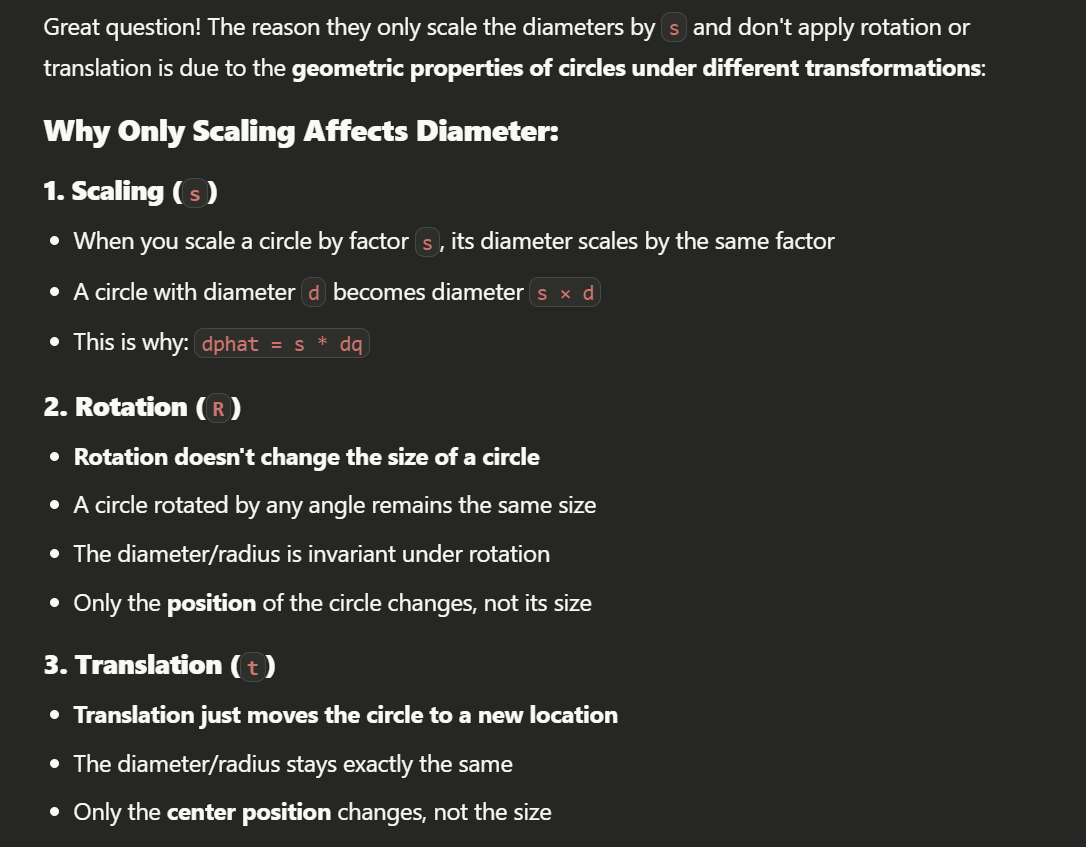

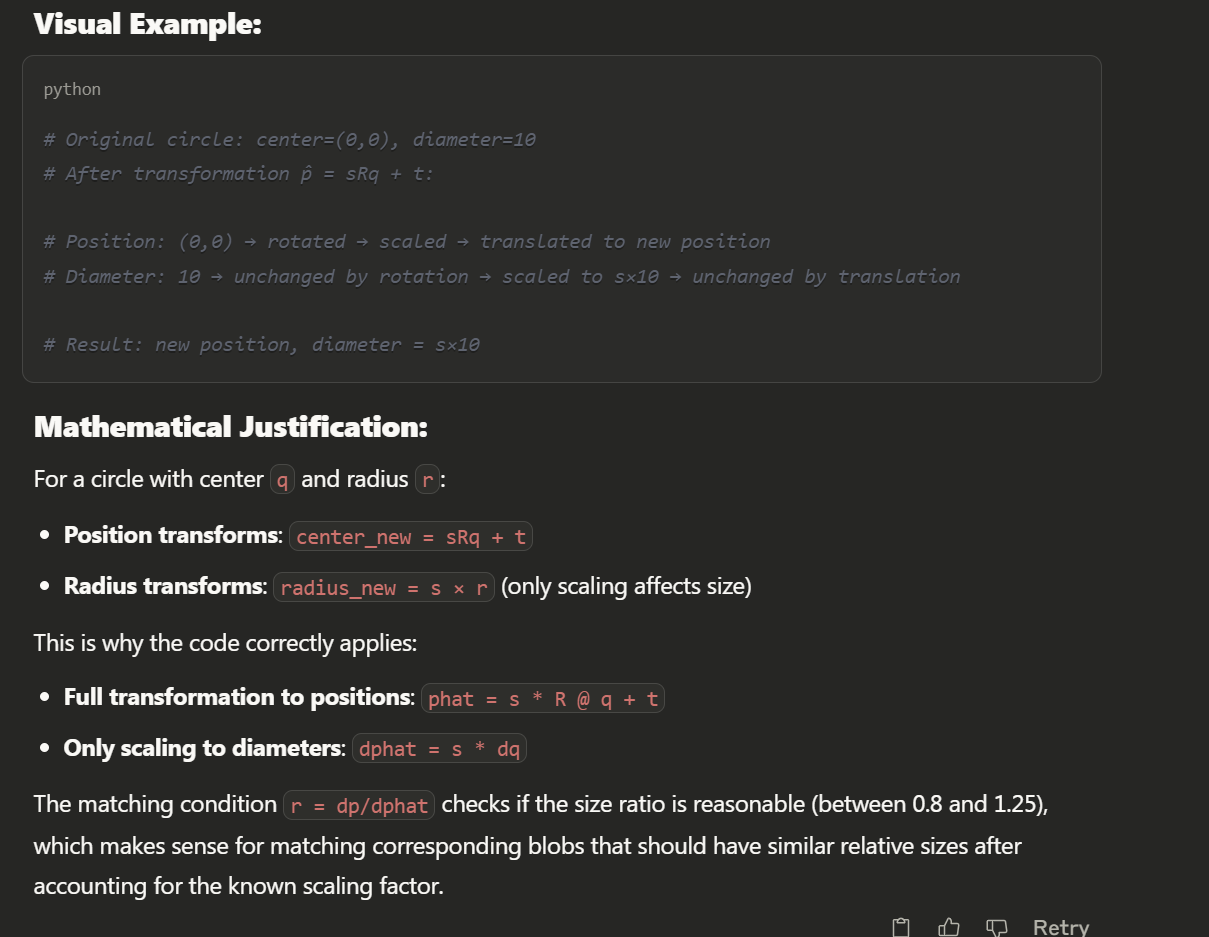